# BREAKING NEWS

## Motivation
In the wake of the November 2015 Paris attacks that killed 128 people, Facebook users across the world expressed their support for Parisians by adding [French flag filters to their profiles](http://time.com/4113171/paris-attacks-facebook-filter-french-flag-profile-picture/) and posting statuses like "Pray for Paris". Yet some observers noted that at the same time, [more than 2000 Nigerians were killed by the Boko Haram](http://www.theguardian.com/world/2015/jan/12/-sp-boko-haram-attacks-nigeria-baga-ignored-media)and [an al-Shabab attack killed 147 Kenyans](http://www.bbc.com/news/blogs-trending-34833134) but received little media attention. These imbalances in coverage raise the question, what does it take for the general public to care about a tragedy? Do people expect more deaths in countries outside the general "Western world"\* such that they are not shocked unless there is a sufficiently terrible catastrophe?

\*"Western world" is something of a [nebulous term](https://en.wikipedia.org/wiki/Western_world) and we don't use it in a particularly precise way here.

## Experiment

We tested, for different countries, what magnitude of disaster is necessary to get American's attention by measuring people's expectations for casualties in news stories. We had each participant read a short Facebook post+news story about an earthquake in a particular country, varying the country across participants. To limit how well they read the passage, we gave them ten seconds to read it (short enough that subjects could get a gist of the article, but had to rely on their general expectations to remember the exact number of casualties). 

The articles went as followed:

![example of stimulus](samp_stim.png)

We varied the countries and cities across participants:
* Abuja, Nigeria
* Takasaki, Japan
* Okara, Pakistan
* Brownsville, Texas, United States (given that we limited our subject pool to Americans, we added more resolution)
* Rennes, France
* Taganrog, Russia

We chose cities with comparable populations (although it is unlikely our participants have heard of these places). For this initial pilot, we kept the number of casualties and name constant at 211 and Jeffrey Smith, respectively.

After reading this, we asked participants (in order)

1. Who wrote the post?
2. Where did the earthquake strike?
3. How many casualties were there?

We expect that the expected number of casualties will be higher for countries that are farther removed from the United States and/or where the American media frequently reports large numbers of deaths.

In [17]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(style="white", color_codes=True)

countries=['Nigeria','Japan','Pakistan','United States','France','Russia'] # These are mapped as 0-5 in our dataset

Let's get our data

In [18]:
def load_data(fname):
    stereo_file=open(fname,'rU')
    stereo_read=csv.reader(stereo_file, quotechar="'")
    
    true_country=[]
    resp_country=[]
    resp_poster=[]
    resp_casualties=[]
    
    for row in stereo_read:
        if row[12]!='':
            true_country.append(row[5])
            resp_country.append(row[10])
            resp_poster.append(row[11])
            resp_casualties.append(float(row[12])+1)

    all_data={'true_country':np.array(true_country),'resp_country':resp_country, \
              'resp_poster':resp_poster,'resp_casualties':np.array(resp_casualties)}
    return all_data

all_data=load_data('mturk_data_itNews_v2.csv')
correct=211+1
correct_log10=np.log10(correct)

I seem to have a few stupid errors in this code (forgot to check whether people entered anything...) so the counts aren't quite even, but close enough for a pilot

In [19]:
a,country_count=np.unique(all_data['true_country'],return_counts=True)
print np.array([countries,country_count])

[['Nigeria' 'Japan' 'Pakistan' 'United States' 'France' 'Russia']
 ['30' '28' '26' '30' '26' '24']]


## How many casualties did people expect?
Let's see how many casualties people expected overall. 

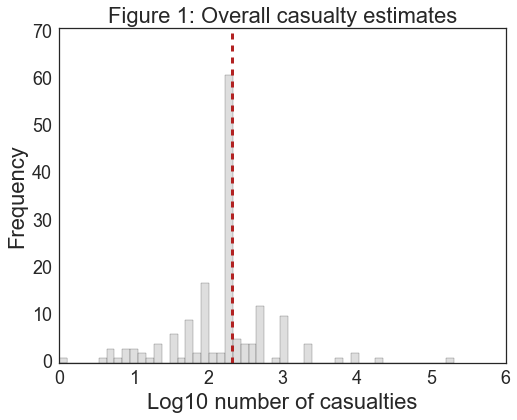

In [20]:
all_data['resp_casualties_log10']=np.log10(all_data['resp_casualties'])

plt.figure(figsize=(8,6))

n, bins, patches = plt.hist(all_data['resp_casualties_log10'], 50, facecolor='lightgrey', alpha=0.75)

# add a 'best fit' line
l = plt.plot([correct_log10,correct_log10], [0,np.max(n)+10], 'b--', linewidth=3,c='firebrick')

plt.title('Figure 1: Overall casualty estimates',fontsize='22')
plt.xlabel('Log10 number of casualties',fontsize='22')
plt.ylabel('Frequency',fontsize='22')
plt.axis([0, 6, 0, np.max(n)+10])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

Here is a histogram of how many casualties people reported. The dashed red line is the correct answer (hence why it's so frequent). So we see peeks at the correct answer (211) and round numbers (2==100, 3==1000)

Now let's divide this up by country

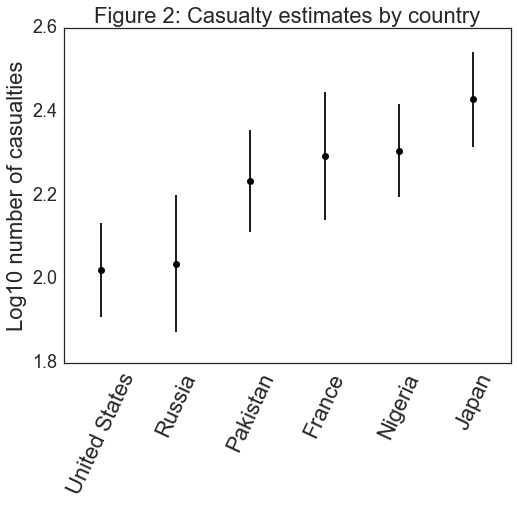

In [21]:
country_log10_mean=[]
country_log10_sem=[]
for tc in np.unique(all_data['true_country']):
    country_log10_mean.append(np.mean(all_data['resp_casualties_log10'][all_data['true_country']==tc]))
    country_log10_sem.append(np.std(all_data['resp_casualties_log10'][all_data['true_country']==tc]) \
                             /np.sqrt(np.sum([all_data['true_country']==tc])))    

country_sort=np.argsort(country_log10_mean)
country_log10_mean_2=[country_log10_mean[i] for i in country_sort]
country_log10_sem_2=[country_log10_sem[i] for i in country_sort]
countries2=[countries[i] for i in country_sort]

plt.figure(figsize=(8,6))

plt.title('Figure 2: Casualty estimates by country',fontsize='22')
plt.errorbar(range(len(country_log10_mean)), country_log10_mean_2, yerr=country_log10_sem_2,c='black',fmt='o')
plt.ylabel('Log10 number of casualties',fontsize='22')
plt.xticks(range(len(country_log10_mean)), countries2, rotation='65',fontsize=22)
plt.yticks(fontsize=18)
plt.locator_params(axis='y',nbins=4)
plt.axis([-.5, 5.5, 1.8, 2.6])
plt.show()

I've rank ordered people's casualty expectations. A few observations and (very) speculative explanations:

* People expect relatively few casualties from articles in the US and Russia. The low number of expected US casualties is consistent with American's expecting few US deaths and paying more attention when Americans die. We are uncertain what caused the low number of expected Russian casualties. There have been few large scale Russian tragedies that have circulated in American news recently. On the other hand, we expected that the current tensions between the US and Russia could cause American's to overestimate Russian casualties. This requires further investigation  
* People expect more casualties in articles about Pakistan and Nigeria, consistent with them being further from traditional conceptions of the "Western world"  
* Japan and France, despite possessing high GDPs and being allied with the US since at least the end of World War II, have very high casualty expectations. These patterns may reflect the strong association between Japan and earthquakes (such as the recent 2011 earthquake and subsequent Fukushima disaster) and people overgeneralizing the recent Paris attacks


['NG', 'JP', 'PK', 'US', 'FR', 'RU']
['#1f73b1', '#081d58', '#3aafc3', '#ffffd9', '#1e7eb7', '#f9fdcd']


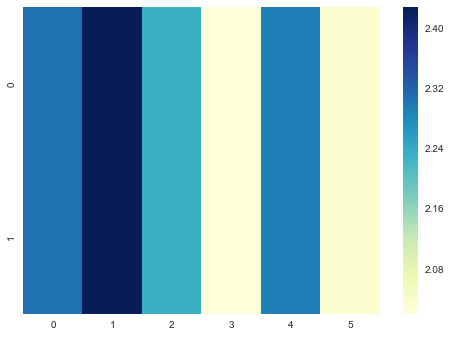

In [135]:
c_hmap=sns.heatmap([country_log10_mean,country_log10_mean],cmap="YlGnBu")
country_colors_rgb01=c_hmap.get_children()[0].get_facecolors()[0:6]

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

country_colors_hex=[  rgb_to_hex(tuple([int(255*i2) for i2 in i[0:3]])) for i in country_colors_rgb01]
country_codes = ['NG','JP','PK','US','FR','RU']
print country_codes
print country_colors_hex

![world map](centreeurope22.svg)

# Interim summary

We are seeing some really fascinating patterns that capture people's expectations about tragedies in different countries. It seems to take fewer American casualties to surpass people's expectations than Pakistani, French, Nigerian or Japanese deaths. However, it's important to note that this is an initial pilot study and these results must be replicated. As Figure 1 demonstrates, the modal response was around the correct number of deaths, weakening our experiment's ability to detect expectation driven biases.

There are three next steps that we're planning on taking to really flesh our findings out:

1. Gather real-world statistics on possible predictors (GDP, physical distance, tourism, article mentions, etc.)-We currently don't have a quantitative explanation for these results, just our general intuitions. People might be relying on some combination of these cues to reason about the articles
2. Expand the roster of countries-Building on the predictors, there may be other countries that we find useful to add to washout idiosyncratic biases (e.g., Japan being earthquake prone)
3. Examine how these biases change as they propogate through social networks-On Facebook and other social networks, people don't just read the posts; they also remember then, form their own impression of it and construct a new post. As that process repeats, the content of the original message will become distorted by the network's general expectations. Having people do this task in a similar social network (like the one used in Lew & Vul, 2015, Prior expectations in visual memory revealed by iterated learning) will allow us to examine these dynamics. Additionally, because the correct answer will change as it is passed from person to person, we will also being able to circumvent the problem of people remembering the correct answer 

